## Climate Analysis from Weather Station Observations

In [1]:
# Set up and Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta, date

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

##  Explore Database

In [9]:
## View table details
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [10]:
# get the table names (same result as: Base.classes.keys() )
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# for first table, get a list of column names and types in a more pleasing format
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# for second table, get a list of column names and types in a more pleasing format
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# for the first table, view the data structure
engine.execute('select * from Measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
engine.execute('select * from Station limit 30').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date_str = session.query(func.max(Measurement.date)).one()[0]
recent_date_str

'2017-08-23'

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
for recent_date in recent_date_str:    
    recent_date = dt.datetime.strptime(recent_date_str, "%Y-%m-%d")
recent_date

# Calculate the date one year from the last date in data set.
one_year_ago = recent_date - timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
precipitations_query = session.query(Measurement.date, Measurement.prcp)
precipitations_query

## Filter and extract the data to include only the past year's of precipitations
past_year_precipitations_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
past_year_precipitations_query
                                   
# # Save the query results as a Pandas DataFrame and set the index to the date column
past_year_precipitations_df = pd.DataFrame(past_year_precipitations_query, columns=['date','precipitation'])
past_year_precipitations_df.set_index(past_year_precipitations_df['date'], inplace=True)

# # Sort the dataframe by date
past_year_precipitations_df.sort_index()
past_year_precipitations_df



,date,precipitation
date,,
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
2016-08-28,2016-08-28,0.01
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


<Figure size 576x432 with 0 Axes>

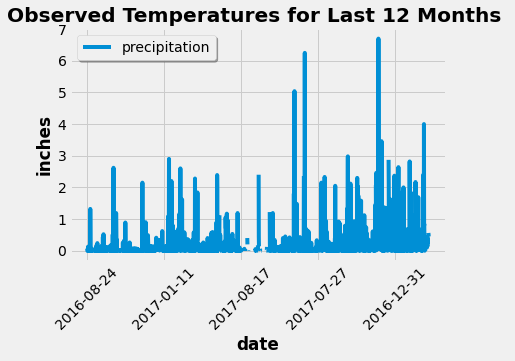

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
fig=plt.figure(figsize=(8,6))

past_year_precipitations_df.plot()
plt.title(f'Observed Temperatures for Last 12 Months ', fontweight ="bold") 
plt.xticks(rotation=45)
plt.xlabel('date', fontweight="bold")
plt.ylabel('inches', fontweight="bold")
plt.legend(loc='upper left', shadow=True)
plt.tight_layout

plt.savefig(f'images/TemperaturesFOR12months.png')


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
past_year_precipitations_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
total_number_of_stations = session.query(Station.station).group_by(Station.station).all()
total_number_of_stations_no = len(total_number_of_stations)
total_number_of_stations_no

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                       group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_result = session.query(Measurement.station).\
                       group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station = most_active_station_result[0]

print(f'{most_active_station} has the greatest number of temperature observations with statistics as follows: ')

## temperature statistics: minimum, maximum, and average over the last year of data
station_min_result = session.query(func.min(Measurement.tobs)).\
                            filter(Measurement.station == f'''{most_active_station}''').all()
station_min = station_min_result[0]
station_min = (f'{station_min}'[:5]).strip('(,)')
station_min
station_max_result = session.query(func.max(Measurement.tobs)).\
                            filter(Measurement.station == f'''{most_active_station}''').all()
station_max = station_max_result[0]
station_max = (f'{station_max}'[:5]).strip('(,)')
station_avg_result = session.query(func.avg(Measurement.tobs)).\
                            filter(Measurement.station == f'''{most_active_station}''').all()
station_avg = station_avg_result[0]
station_avg = (f'{station_avg}'[:5]).strip('(,)')
station_avg
print(f'{station_min}°F is the minimum, {station_max}°F is the maximum, and {station_avg}°F is the average')

USC00519281 has the greatest number of temperature observations with statistics as follows: 
54.0°F is the minimum, 85.0°F is the maximum, and 71.6°F is the average


In [22]:
# Using the most active station id
## join to get station name

station_name_query = '''
select s.station, s.name
from station as s
join measurement as m on
s.station=m.station
where m.station = 'USC00519281'
group by s.station
'''
## read to pandas to view station name and station id
station_name_df = pd.read_sql_query(station_name_query, con=conn, index_col='name')
station_name_df.head()

,station
name,
"WAIHEE 837.5, HI US",USC00519281


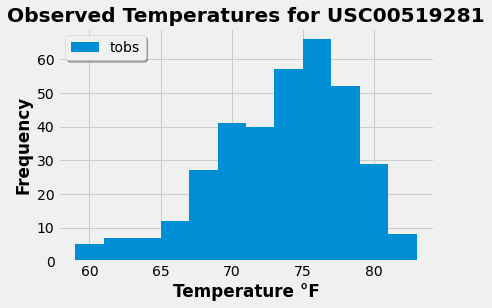

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
past_year_temperatures = session.query(Measurement.tobs).\
                                filter(Measurement.station == f'''{most_active_station}''').\
                                filter(Measurement.date >= one_year_ago).all()
past_year_temperatures_df = pd.DataFrame(past_year_temperatures, columns=['tobs'])
past_year_temperatures_df.sort_index()
past_year_temperatures_df.head()

past_year_temperatures_df.plot.hist(bins=12)
plt.title(f'Observed Temperatures for {most_active_station}', fontweight="bold")
plt.xlabel('Temperature °F', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.legend(loc='upper left', shadow=True)

plt.tight_layout

plt.savefig(f'images/USC00519281Temperatures.png')

plt.show()

# Close session

In [24]:
# Close Session
session.close()